In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size']=15

In [4]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [9]:
# creamos el dataframe con los feature names 
data = pd.DataFrame(data= iris.data, columns=iris.feature_names)

# creamos el dataframe con los targets (las especies de flor)
target = pd.DataFrame(data=iris.target, columns=['species'])

#unimos ambos df con concat, agregamos una nueva columna

data = pd.concat([data,target], axis=1)

# para mezclar en orden aleatorio
data = data.sample(frac=1, random_state=1234)

#imprimimos los primeros registros del nuevo df
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


In [10]:
#fraccion de entrenamiento 0.8
Ntrain= int(data.shape[0] * 0.8)

#datos de entrenamiento (80%)

traint = data.iloc[:Ntrain, :]

# datos de prueba.

test = data.iloc[Ntrain: , :]

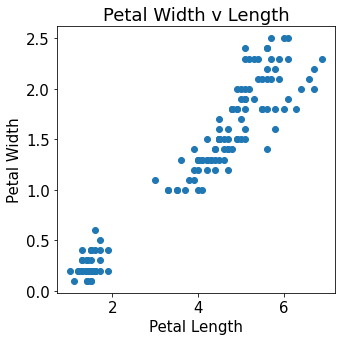

In [11]:
# definimos variables para acceder de forma sencilla a las columnas del df

plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la grafica que compara el ancho (y) con el largo(x) del petalo

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength,pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v Length")
f.tight_layout()


In [14]:
#importamos un objeto de regresión lineal de sklearn

model_1 = linear_model.LinearRegression()

# ajustamos el modelo a nuestros datos 
model_1.fit(pd.DataFrame(traint.iloc[:, 2]), traint.iloc[:, 3])

#imprimir los coeficientes
print("Coef \n", model_1.coef_)

#imprimir el sesgo o bias.
print("\n\n Bias \n", model_1.intercept_)

Coef 
 [0.41490802]


 Bias 
 -0.357589314248546


<bound method Figure.tight_layout of <Figure size 360x360 with 1 Axes>>

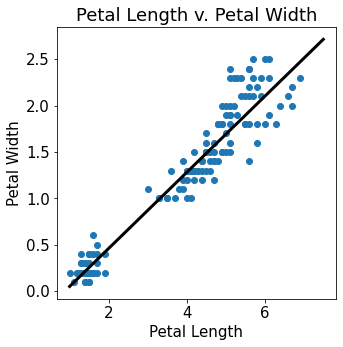

In [16]:
plength =  data["petal length (cm)"]
pwidth = data["petal width (cm)"]

#definimos un array desde el valor minimo hasta el mayor del petal length

xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# ecuacion de la regresión lineal t1*x+t0=y (t es tita, la letra griega, y "x" es el largo del petalo y "y" su ancho)

yvals = 0.41*xvals - 0.36

#graficamos la recta de la regresión lineal y la ecuacion

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals,yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Petal Width")
f.tight_layout

In [18]:
#prediccion con model 1 utilizando los datos de prueba

ypredict = model_1.predict(pd.DataFrame(test.iloc[:,2]))

#calculamos el MSE con los valores predichos en y

print('MSE: %.2f' % mean_squared_error(pd.DataFrame(test.iloc[:,3]), ypredict))

#calculamos R**2 con los valores predichos en y.

print('R**2: %.2f' % r2_score(pd.DataFrame(test.iloc[:,3]), ypredict))

MSE: 0.04
R**2: 0.94


# Regresion logistica

In [33]:
#preparamos los datos de entrenamiento y prueba en "x" y "y", la última columna es de la etiquera de la especie

xtrain = traint.iloc[:, :-1] #input, training
ytrain = traint.iloc[:, -1] #output, training
xtest = test.iloc[:, :-1] #input, testing
ytest = test.iloc[:, -1] #output, testing

#configura,os el modelo de regresion logistica linear_model
model_2 = linear_model.LogisticRegression()

# ajustamos el modelo con los datos de entrenamiento
model_2.fit(xtrain, ytrain)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# hacer predicciones con el conjunto de prueba 
ypred = model_2.predict(xtest)

#probamos el accuracy del modelo generado

print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


### Matriz de confusion  

In [35]:
# usaremos la matriz de confusion para verificar el testing cuando el problema sea mas complicado

from sklearn.metrics import confusion_matrix

#los aplicamos al testing y a la prediccion
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]], dtype=int64)

### arboles de decision
    

In [40]:
#creamos el clasificador como en este ejemplo sabemos que son 3 las diferentes especies lo haremos en función de ello
clf = RandomForestClassifier(n_estimators=3)

#entrenamos el modelo 
clf.fit(xtrain, ytrain)

#generamos la predicción

y_predict = clf.predict(xtest)

#probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, y_predict))

Testing accuracy = 1.0


In [41]:
k2model = KMeans (n_clusters=3, random_state=42)
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])
print("Inertia = ", k2model.inertia_)
print("Centroids (x,y,z) = \n", k2model.cluster_centers_)

Inertia =  31.371358974358948
Centroids (x,y,z) = 
 [[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


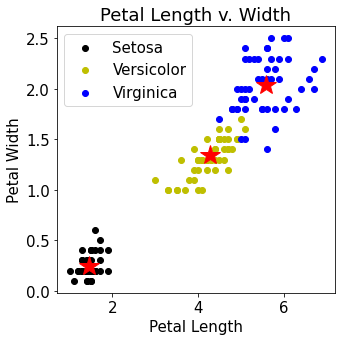

In [46]:
#graficamos los datos con la linea para setosa.

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

#setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')
#versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='y')
#virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

ax.plot(k2model.cluster_centers_[:, 0],
        k2model.cluster_centers_[:, 1],
        "r*", markersize=20)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()